In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import Datasets

In [ ]:
DATASET_PATH_FMT = "/content/drive/MyDrive/Datasets/Loan_Eligibility/{}"

TRAIN_DATA_PATH = DATASET_PATH_FMT.format("loan-train.csv")
TEST_DATA_PATH = DATASET_PATH_FMT.format("loan-test.csv")

In [ ]:
train = pd.read_csv(TRAIN_DATA_PATH)
test = pd.read_csv(TEST_DATA_PATH)

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
for col in train.drop("Loan_ID", axis=1):
  print("-" * 20, col, sep="\t")
  print(train[col].value_counts(), "\n")

--------------------	Gender
Male      489
Female    112
Name: Gender, dtype: int64 

--------------------	Married
Yes    398
No     213
Name: Married, dtype: int64 

--------------------	Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

--------------------	Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

--------------------	Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64 

--------------------	ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

--------------------	CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

--------------------	LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plotter(columns, axes, df, plt_type='bar'):
  for column, axis in zip(columns, axes):
    getattr(df[column].value_counts(normalize=True).plot, plt_type)(ax=axis, title=column)
    axis.set_xlabel(column)
    axis.set_ylabel("Percentage")
    axis.tick_params(axis='x', rotation=0)

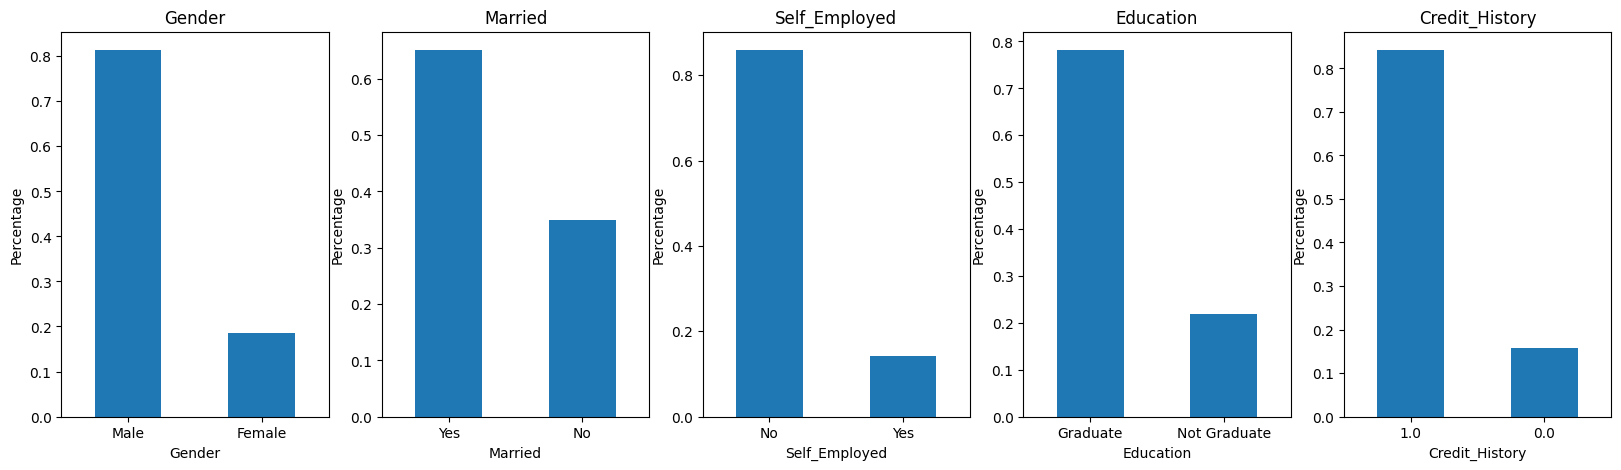

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

plotter(
    columns=[
      "Gender",
      "Married",
      "Self_Employed",
      "Education",
      "Credit_History",
  ],
  axes=axes,
  df=train
)

plt.show()

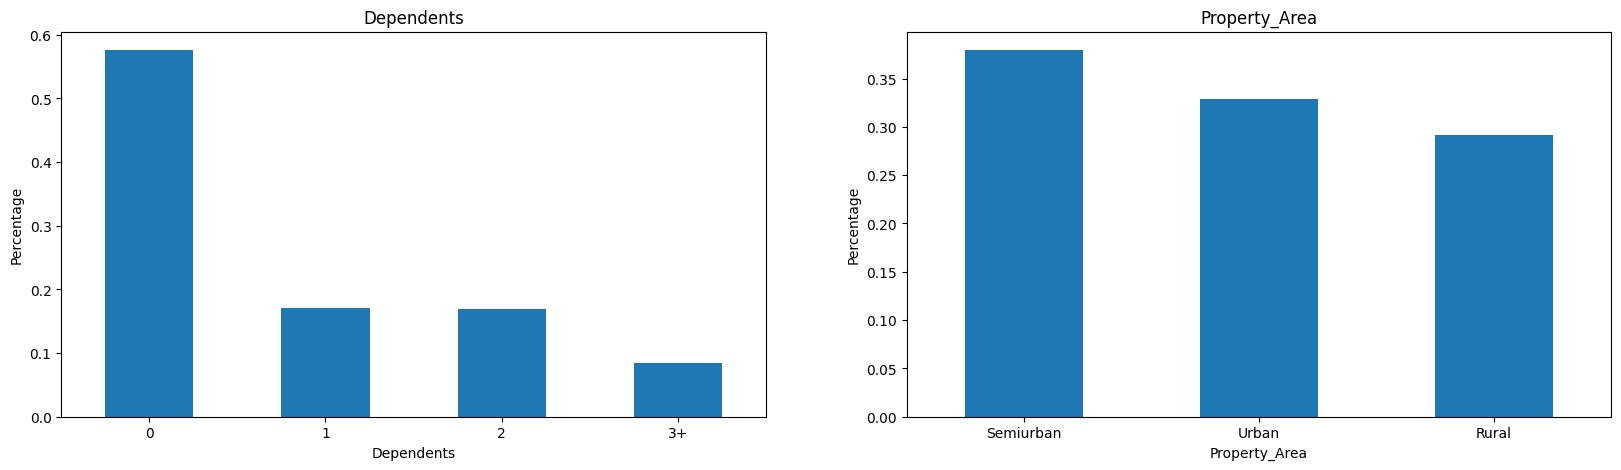

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plotter(
    columns=[
      "Dependents",
      "Property_Area"
  ],
  axes=axes,
  df=train
)

plt.show()

In [ ]:
import seaborn as sns

<ipython-input-12-bb5f9c48efc7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


<Axes: >

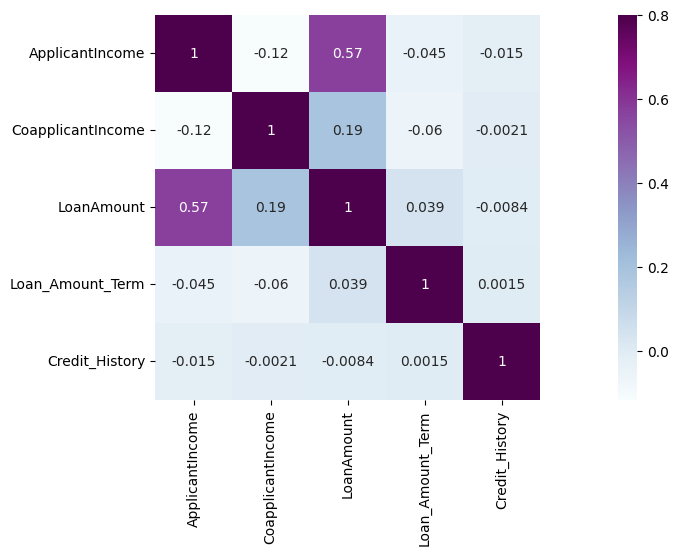

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

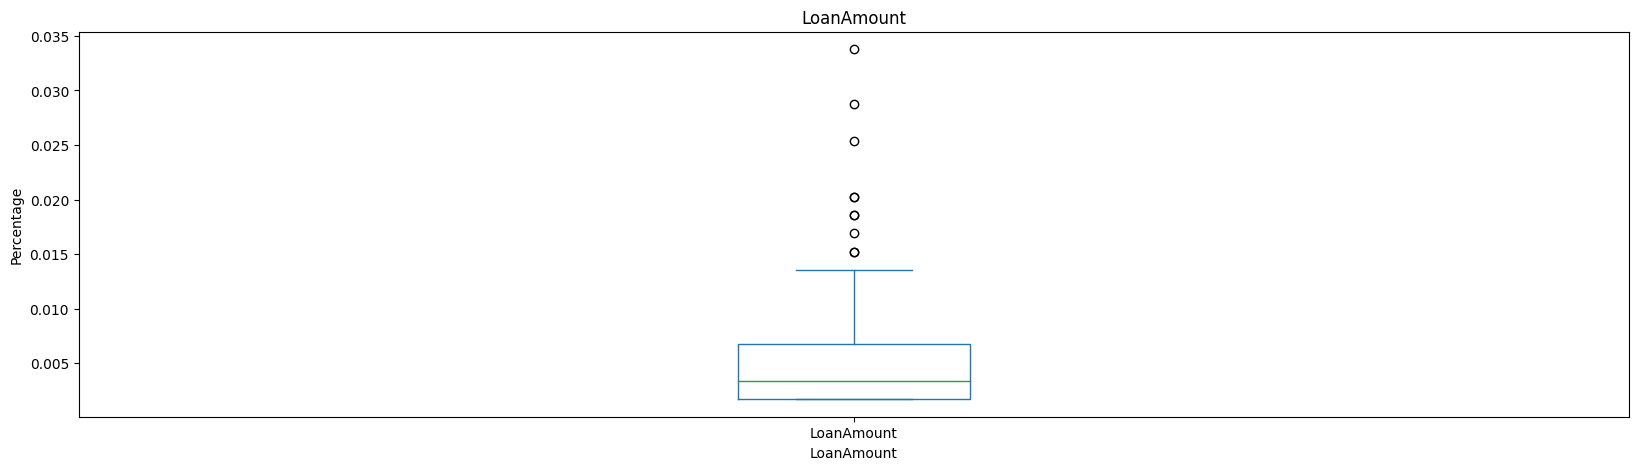

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

plotter(
    columns=[
      "LoanAmount",
  ],
  axes=[axes],
  df=train,
  plt_type='box',
)

plt.show()

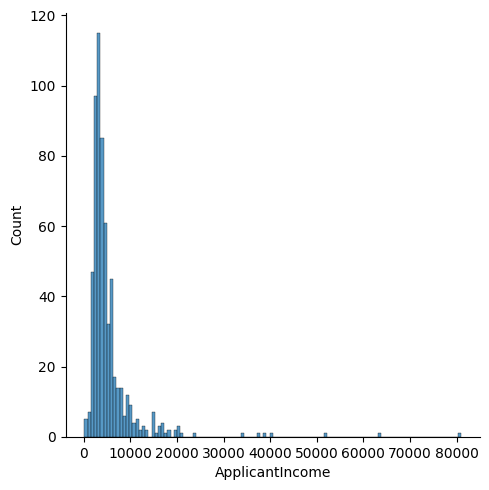

In [ ]:
sns.displot(train["ApplicantIncome"])

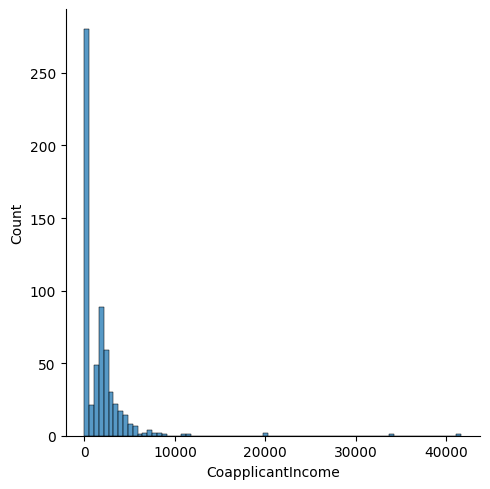

In [ ]:
sns.displot(train["CoapplicantIncome"])

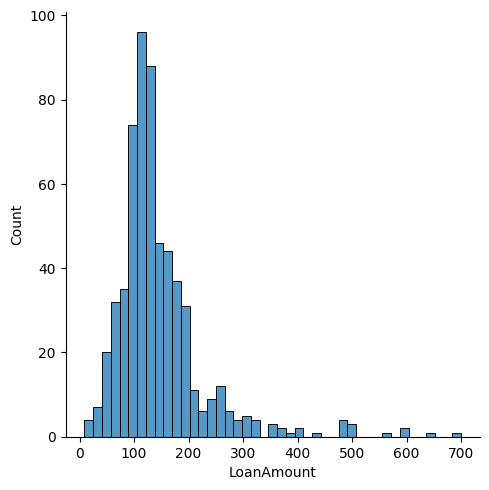

In [ ]:
sns.displot(train["LoanAmount"])

In [ ]:
def bivar_plotter(columns, df, axes, cross_col, kind="bar"):
  for column, axis in zip(columns, axes):
    cross = pd.crosstab(train[column], train[cross_col])
    cross.div(
        cross.sum(1).astype(float),
        axis=0
    ).plot(
        kind=kind, 
        stacked=True,
        ax=axis,
    )

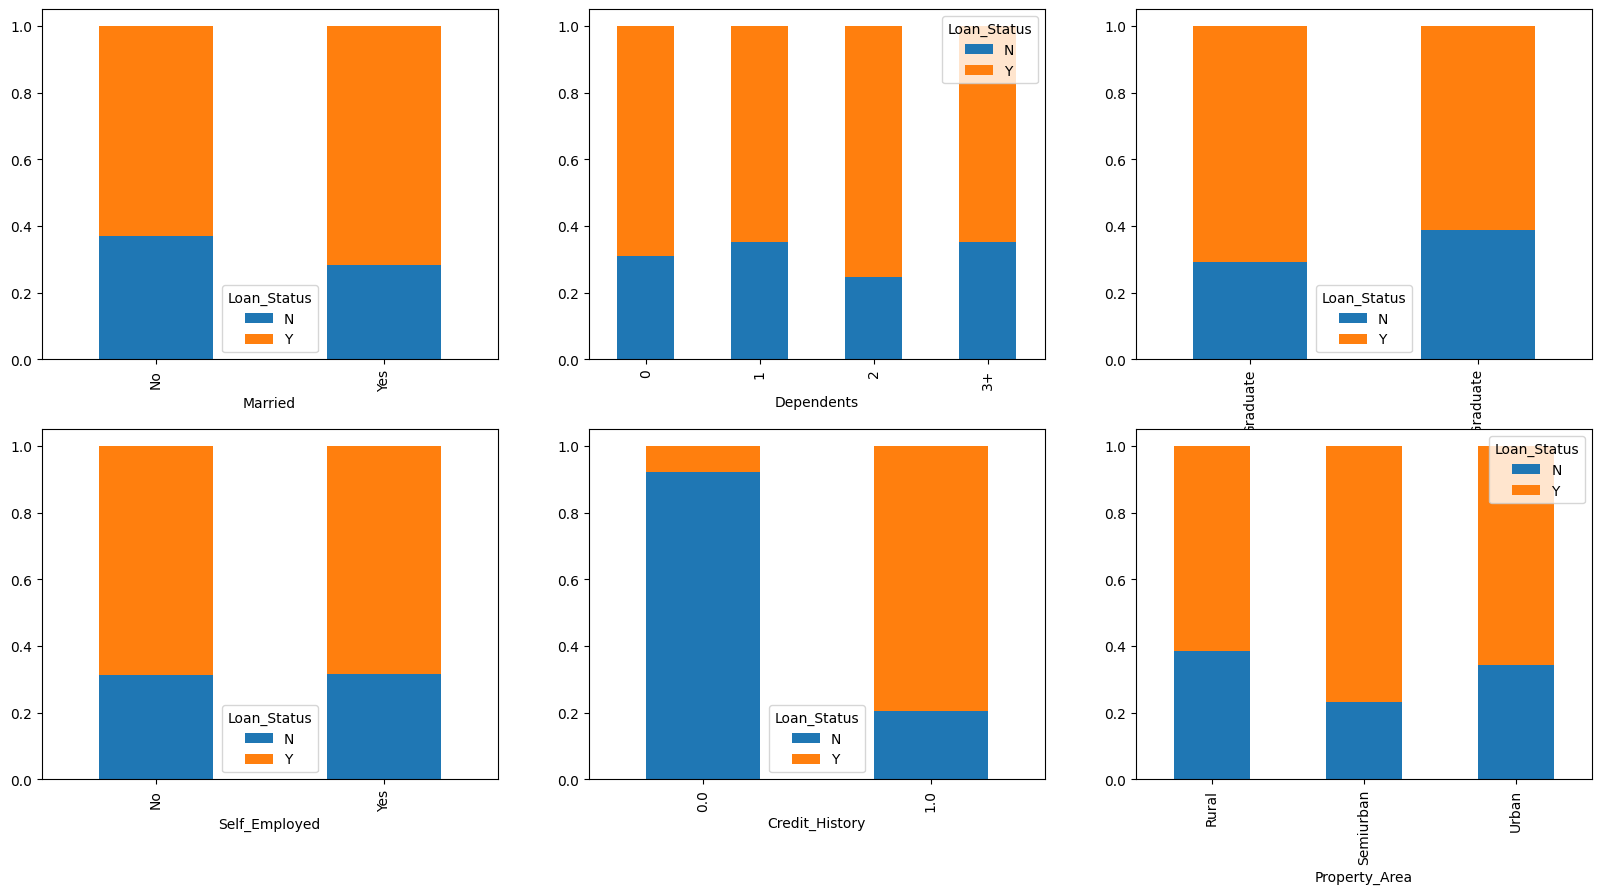

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))


bivar_plotter(
    columns=[
        "Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "Credit_History",
        "Property_Area",
    ],
    df=train,
    axes=axes.flatten(),
    cross_col="Loan_Status",
)

In [ ]:
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

In [ ]:
train[["Total_Income", "ApplicantIncome", "CoapplicantIncome"]].describe()

,Total_Income,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000,614.000000
mean,7024.705081,5403.459283,1621.245798
std,6458.663872,6109.041673,2926.248369
min,1442.000000,150.000000,0.000000
25%,4166.000000,2877.500000,0.000000
50%,5416.500000,3812.500000,1188.500000
75%,7521.750000,5795.000000,2297.250000
max,81000.000000,81000.000000,41667.000000


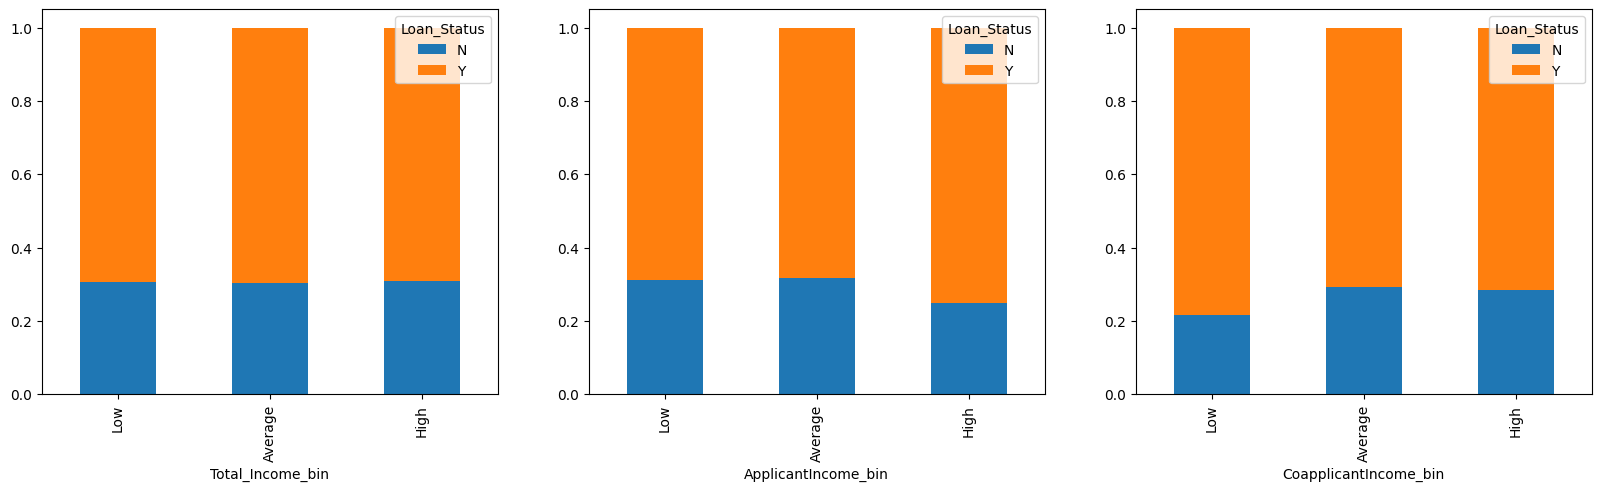

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

columns = ["Total_Income", "ApplicantIncome", "CoapplicantIncome"]

bins = {
    column: {
    level:train[column].mean() + train[column].std() * amount for level, amount in zip(
        ["Low", "Average", "High"],
        range(0, 3),
      )
    } for column in columns
}

for column in columns:
  train[column + "_bin"] = pd.cut(train[column], sorted([0, *bins[column].values()]), labels=bins[column].keys())


bivar_plotter(
    columns=[
        column + "_bin" for column in columns
    ],
    df=train,
    axes=axes.flatten(),
    cross_col="Loan_Status",
)

<ipython-input-22-8e855a7b70ef>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,vmax=.8,square=True,cmap="BuPu", annot = True)


<Axes: >

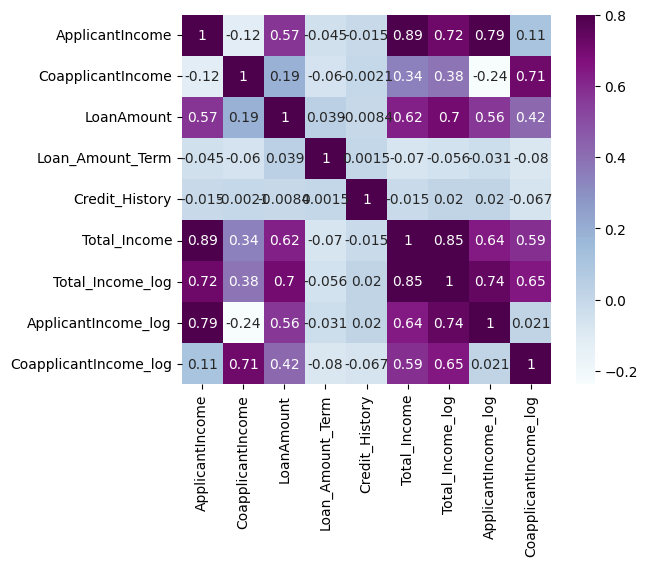

In [ ]:
for column in columns:
  train[column + "_log"] = train[column].apply(np.log)

sns.heatmap(train.corr() ,vmax=.8,square=True,cmap="BuPu", annot = True)